# Data EDA and Visualization
for dataset Arabic translation
https://www.kaggle.com/datasets/kilwazoldik/translate-arabic-dialect-to-modern-standard-arabic


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import re

from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

2024-02-06 14:07:06.783715: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 14:07:06.865580: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 14:07:07.228586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 14:07:07.228665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 14:07:07.308494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [ ]:
# load the dataset
# data_path = "/kaggle/input/translate-arabic-dialect-to-modern-standard-arabic/full arabic dialect data.csv"
data = pd.read_csv(local_data_path)
data.head(5), data.shape

(                                                              source  \
 0  موجود في نهاية الممر، بجيب لك شوي الحين. اذا احتجت شي ثاني خبرني.   
 1                                                      تسوي تعديلات؟   
 2                                            بغينا طاولة يم الدريشة.   
 3                 هو ذاك الصوب، بالضبط جدام استعلامات السياح بالضبط.   
 4                           ما قط سمعت بهالعنوان في هالمنطقة من قبل.   
 
                                                                                  target  
 0   إنها في أخر القاعة . سوف آتي لك ببعض منها الآن . إذا أردت أي شيئاً آخر فقط أعلمني .  
 1                                                              هل تقومون بعمل تعديلات ؟  
 2                                                            نريد مائدة بجانب النافذة .  
 3                                                     هناك ، أمام بيانات السائح تماما .  
 4                                           لم اسمع بهذا العنوان من قبل بالقرب من هنا .  ,
 (145541, 2))

# Preprocessing

In [ ]:
# slice the data, my Hardware crashes with full datasize
data = data.iloc[:100000 ,:]
data

,source,target
0,موجود في نهاية الممر، بجيب لك شوي الحين. اذا احتجت شي ثاني خبرني.,إنها في أخر القاعة . سوف آتي لك ببعض منها الآن . إذا أردت أي شيئاً آخر فقط أعلمني .
1,تسوي تعديلات؟,هل تقومون بعمل تعديلات ؟
2,بغينا طاولة يم الدريشة.,نريد مائدة بجانب النافذة .
3,هو ذاك الصوب، بالضبط جدام استعلامات السياح بالضبط.,هناك ، أمام بيانات السائح تماما .
4,ما قط سمعت بهالعنوان في هالمنطقة من قبل.,لم اسمع بهذا العنوان من قبل بالقرب من هنا .
...,...,...
99995,تفهم فيا فاش نقول؟,هل تفهم ما أقول ؟
99996,انجم نسال على وقت الخروج من هنا؟,هل لي أن أسأل عن وقت المغادرة من هنا ؟
99997,خرج.,إنه بالخارج .
99998,محلاه الكلب. شنوة نوعو؟,يا لها من كلاب ذكية . من أي فصيلة ؟


In [ ]:
# Remove punctuation
# Function to remove punctuation from Arabic text
def remove_punctuation_arabic(text):
    # Define Arabic punctuation characters
    arabic_punctuation = string.punctuation + '؛،؟ـ'

    # Remove punctuation using regex
    return re.sub('[' + re.escape(arabic_punctuation) + ']', '', text)

# Apply the function to both "source" and "target" columns
data['source'] = data['source'].apply(remove_punctuation_arabic)
data['target'] = data['target'].apply(remove_punctuation_arabic)


In [ ]:
data['source'][0]

'موجود في نهاية الممر بجيب لك شوي الحين اذا احتجت شي ثاني خبرني'

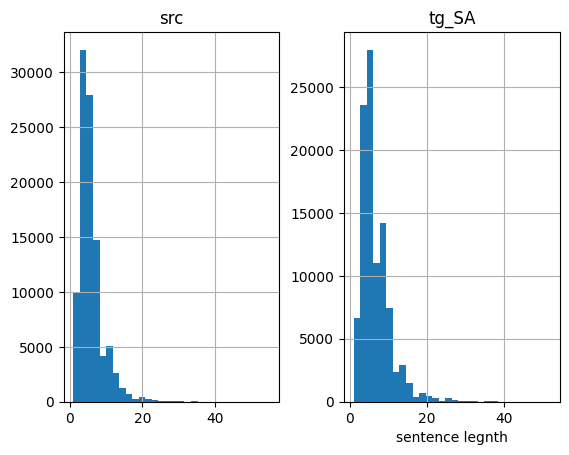

In [ ]:
# empty lists
src_l = []
tg_l = []

# populate the lists with sentence lengths
for i in data['source']:
      src_l.append(len(i.split()))

for i in data['target']:
      tg_l.append(len(i.split()))

length_df = pd.DataFrame({'src':src_l, 'tg_SA':tg_l})

length_df.hist(bins = 30)
plt.xlabel("sentence legnth")
plt.show()

In [ ]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer(split=" ")
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# prepare english tokenizer
src_tokenizer = tokenization(data['source'])#.str.cat(sep=' '))
src_vocab_size = len(src_tokenizer.word_index) + 1

src_length = 13
print('Dialect Vocabulary Size: %d' % src_vocab_size)
src_tokenizer.index_word

Dialect Vocabulary Size: 58152


{1: 'من',
 2: 'في',
 3: 'و',
 4: 'ما',
 5: 'ممكن',
 6: 'لو',
 7: 'سمحت',
 8: 'على',
 9: 'بس',
 10: 'شي',
 11: 'أنا',
 12: 'انا',
 13: 'عندك',
 14: 'واحد',
 15: 'اللي',
 16: 'بدي',
 17: 'وين',
 18: 'هو',
 19: 'هاد',
 20: 'بغيت',
 21: 'رح',
 22: 'ده',
 23: 'مش',
 24: 'لازم',
 25: 'مع',
 26: 'لا',
 27: 'واش',
 28: 'إذا',
 29: 'كتير',
 30: 'كل',
 31: 'دولار',
 32: 'عندي',
 33: 'شو',
 34: 'فضلك',
 35: 'بتريد',
 36: 'هنا',
 37: 'بعد',
 38: 'اي',
 39: 'عايز',
 40: 'هذا',
 41: 'فيه',
 42: 'يا',
 43: 'عافاك',
 44: 'لي',
 45: 'انت',
 46: 'أي',
 47: 'فيك',
 48: 'كان',
 49: 'عن',
 50: 'فين',
 51: 'هذي',
 52: 'ديال',
 53: 'يوم',
 54: 'هي',
 55: 'الساعة',
 56: 'هون',
 57: 'رقم',
 58: 'غادي',
 59: 'تقدر',
 60: 'حق',
 61: 'كم',
 62: 'لما',
 63: 'إزا',
 64: 'خمسة',
 65: 'كنت',
 66: 'ايه',
 67: 'يمكن',
 68: 'هل',
 69: 'كيف',
 70: 'عم',
 71: 'بقدر',
 72: 'هناك',
 73: 'شوية',
 74: 'وقت',
 75: 'اليوم',
 76: 'هيك',
 77: 'مو',
 78: 'عشان',
 79: 'شنو',
 80: 'مرة',
 81: 'دي',
 82: 'هيدا',
 83: 'قبل',
 84: 'ولا

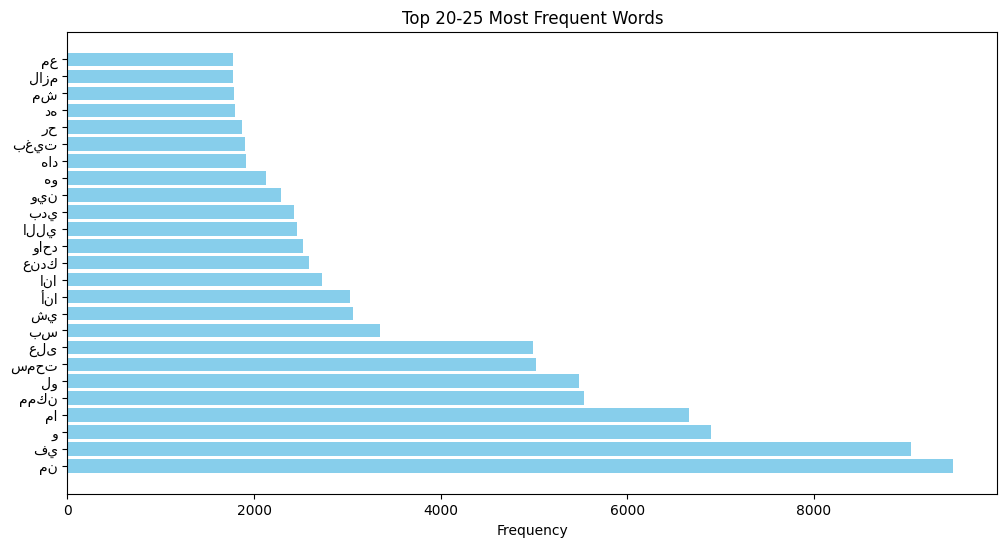

In [ ]:
from collections import OrderedDict

word_freq = src_tokenizer.word_counts

# Sort the OrderedDict by frequency in descending order
sorted_word_freq = OrderedDict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Extract the top 20-25 words and their frequencies
top_words = list(sorted_word_freq.keys())[:25]
top_frequencies = list(sorted_word_freq.values())[:25]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20-25 Most Frequent Words')
# plt.gca().invert_yaxis()  # To have the highest frequency at the top
plt.show()

In [ ]:
# prepare Deutch tokenizer
tg_tokenizer = tokenization(data['target'])
tg_vocab_size = len(tg_tokenizer.word_index) + 1

tg_length = 15
print('Target Standard Arabic Vocabulary Size: %d' % tg_vocab_size)
tg_tokenizer.index_word

Target Standard Arabic Vocabulary Size: 22544


{1: 'من',
 2: 'هل',
 3: 'أن',
 4: 'في',
 5: 'فضلك',
 6: 'هذا',
 7: 'إلى',
 8: 'على',
 9: 'لا',
 10: 'و',
 11: 'أريد',
 12: 'ما',
 13: 'هذه',
 14: 'أين',
 15: 'هنا',
 16: 'لي',
 17: 'أنا',
 18: 'هناك',
 19: 'لك',
 20: 'أي',
 21: 'هو',
 22: 'لقد',
 23: 'يمكن',
 24: 'يمكنني',
 25: 'ذلك',
 26: 'كم',
 27: 'عن',
 28: 'نعم',
 29: 'لم',
 30: 'يمكنك',
 31: 'أود',
 32: 'هي',
 33: 'بعض',
 34: 'يا',
 35: 'كيف',
 36: 'بعد',
 37: 'يوجد',
 38: 'إنه',
 39: 'رقم',
 40: 'لديك',
 41: 'ماذا',
 42: 'كل',
 43: 'الآن',
 44: 'إنها',
 45: 'التي',
 46: 'سوف',
 47: 'إذا',
 48: 'ليس',
 49: 'الذي',
 50: 'كان',
 51: 'ثلاثة',
 52: 'متى',
 53: 'حتى',
 54: 'شيء',
 55: 'مع',
 56: 'واحد',
 57: 'أنت',
 58: 'خمسة',
 59: 'لكن',
 60: 'يجب',
 61: 'أستطيع',
 62: 'عندما',
 63: 'غرفة',
 64: 'عشر',
 65: 'إن',
 66: 'حسنا',
 67: 'الساعة',
 68: 'صفر',
 69: 'اليابان',
 70: 'أخرى',
 71: 'فقط',
 72: 'اليوم',
 73: 'هلا',
 74: 'شكراً',
 75: 'كنت',
 76: 'يوم',
 77: 'جداً',
 78: 'بي',
 79: 'كذلك',
 80: 'واحدة',
 81: 'أو',
 82: 'أم',
 83: 